Install & import libraries

In [1]:
!pip install geopandas folium scikit-learn

import geopandas as gpd
import folium
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

Load world GeoJSON file

In [2]:
!wget -q https://github.com/nvkelso/natural-earth-vector/raw/master/geojson/ne_110m_admin_0_countries.geojson -O world.geojson

world = gpd.read_file("world.geojson")
world = world.to_crs(epsg=4326)

world.head()


,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,...,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry
0,Admin-0 country,1,6,Fiji,FJI,0,2,Sovereign country,1,Fiji,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((180 -16.06713, 180 -16.55522, ..."
1,Admin-0 country,1,3,United Republic of Tanzania,TZA,0,2,Sovereign country,1,United Republic of Tanzania,...,None,None,None,None,None,None,None,None,None,"POLYGON ((33.90371 -0.95, 34.07262 -1.05982, 3..."
2,Admin-0 country,1,7,Western Sahara,SAH,0,2,Indeterminate,1,Western Sahara,...,Unrecognized,Unrecognized,Unrecognized,None,None,Unrecognized,None,None,None,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,Admin-0 country,1,2,Canada,CAN,0,2,Sovereign country,1,Canada,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-122.84 49, -122.97421 49.0025..."
4,Admin-0 country,1,2,United States of America,US1,1,2,Country,1,United States of America,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-122.84 49, -120 49, -117.0312..."


Get Centroid Coordinates for each country

In [3]:
world["centroid"] = world.geometry.centroid
world["lat"] = world.centroid.y
world["lon"] = world.centroid.x

/tmp/ipython-input-3470897205.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  world["centroid"] = world.geometry.centroid
/tmp/ipython-input-3470897205.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  world["lat"] = world.centroid.y
/tmp/ipython-input-3470897205.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  world["lon"] = world.centroid.x


Apply K-Means clustering on centroid coordinates

In [5]:
num_clusters = 6

coords = world[["lat","lon"]]
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
world["cluster"] = kmeans.fit_predict(coords)

Visualize cluster distribution using Matplotlib

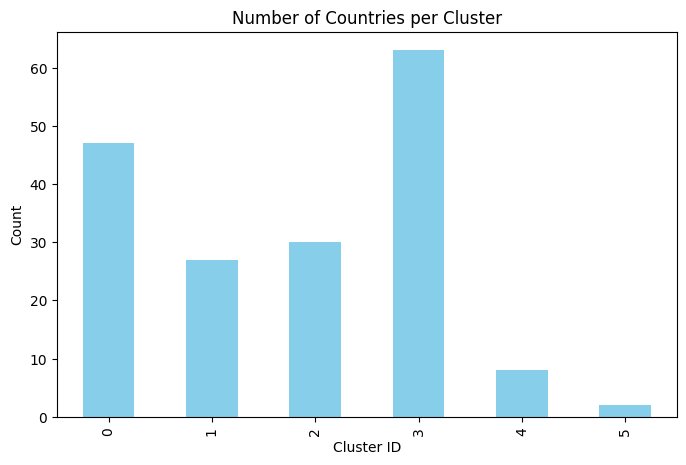

In [6]:
plt.figure(figsize=(8, 5))
world["cluster"].value_counts().sort_index().plot(kind="bar", color="skyblue")
plt.title("Number of Countries per Cluster")
plt.xlabel("Cluster ID")
plt.ylabel("Count")
plt.show()

Create Interactive Folium map with clusters

In [7]:
m = folium.Map(location=[20,0],zoom_start=2, tiles='cartodbpositron')

colors = ['red', 'blue', 'green', 'purple', 'orange', 'darkred', 'cadetblue', 'pink', 'black', 'brown']

for idx, row in world.iterrows():
  folium.CircleMarker(
      location=[row["lat"],row["lon"]],
      radius=5,
      color=colors[row["cluster"]%len(colors)],
      fill=True,
      fill_opacity = 0.8,
      popup=f"{row['ADMIN']}<br>Cluster: {row['cluster']}"
  ).add_to(m)

m